PDF Processing Test
This script tests the PDF processing functionality, specifically:
1. PDF text extraction
2. Image extraction and deduplication
3. Base64 conversion of images
4. Storage of images as extra attachments

In [5]:
import sys
sys.path.append('..')

In [6]:
from src.data.attachments import Attachment, S3Attachment, AttachmentTypes
from src.data.pdf_extractor import PDFExtractor
from src.data.s3_manager import S3Manager
import base64
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [7]:
def display_image(img_data, title=None, page_text=None):
    """Helper function to display an image with its associated page text"""
    img = Image.open(BytesIO(img_data))
    
    # Create a figure with two subplots: one for image, one for text
    fig = plt.figure(figsize=(15, 10))
    
    # Image subplot
    ax1 = plt.subplot(121)
    if title:
        ax1.set_title(title)
    ax1.imshow(img)
    ax1.axis('off')
    
    # Text subplot
    if page_text:
        ax2 = plt.subplot(122)
        ax2.text(0.1, 0.5, page_text, wrap=True, fontsize=10)
        ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

## Test with S3 PDF
Creating S3 attachment for 20201222_-_Planning_for_Gigabit_Delivery_in_2021_V2_1.pdf
Processing PDF...

Extracted Text (first 500 chars):
C:\Users\Student\AppData\Local\Temp\psycore_temp_20201222_-_Planning_for_Gigabit_Delivery_in_2021_V2_1.pdf...

## Test Image Deduplication
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object has no attribute 'attachment_type'
Failed to process image: 'S3Attachment' object 

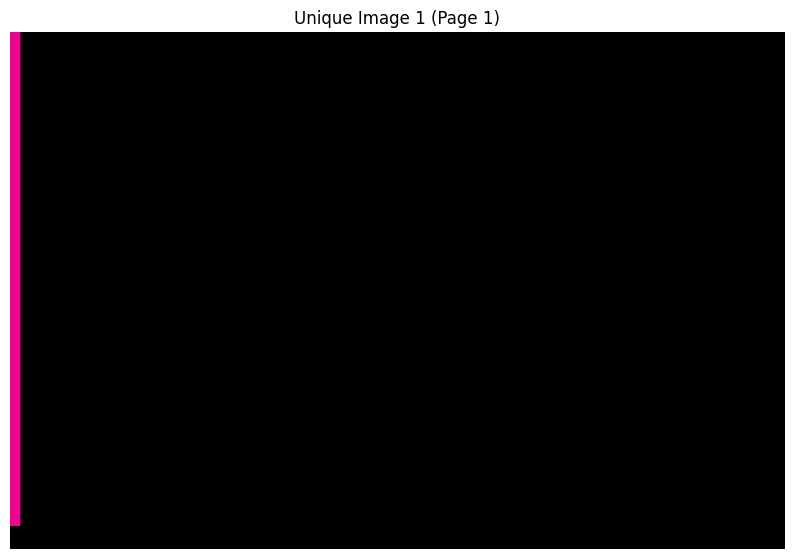


Text from Page 1:
OFFICIAL 



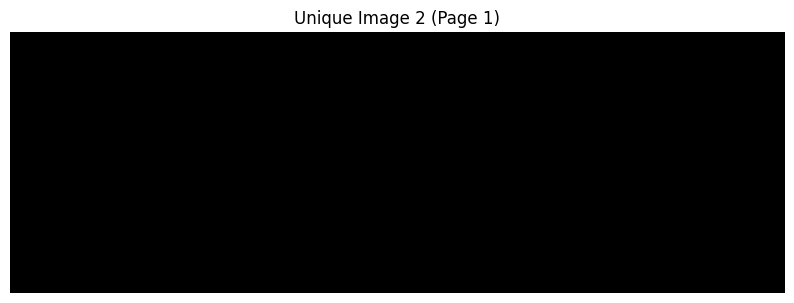


Text from Page 1:
OFFICIAL 



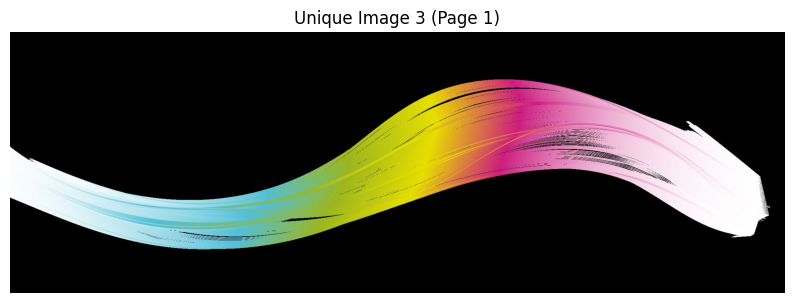


Text from Page 10:
 



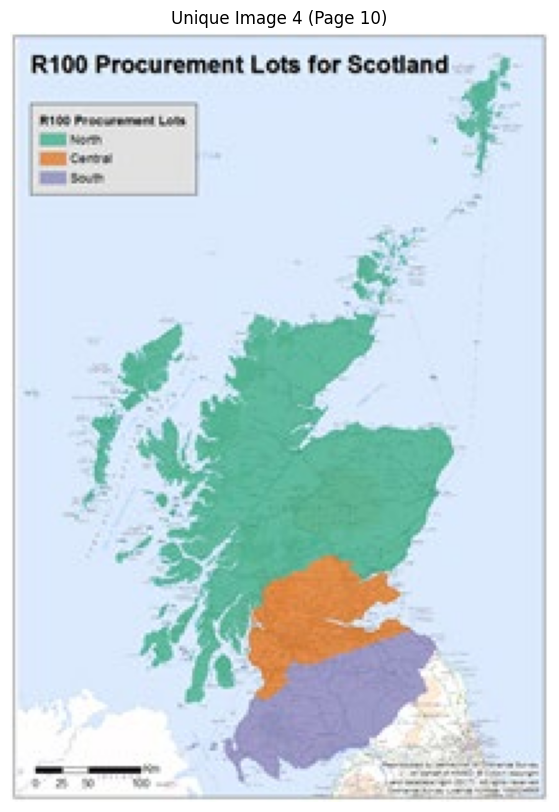


Text from Page 10:
 



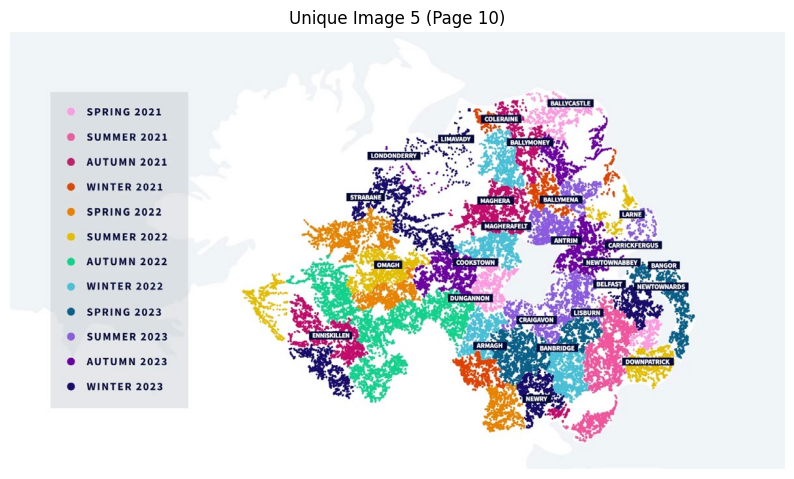


Text from Page 13:
 



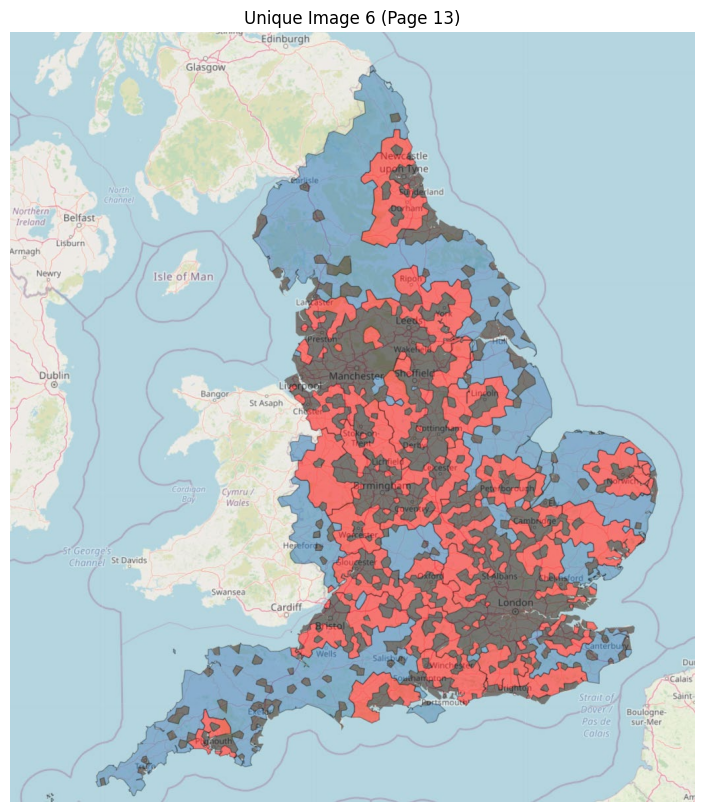


Text from Page 20:
OFFICIAL 



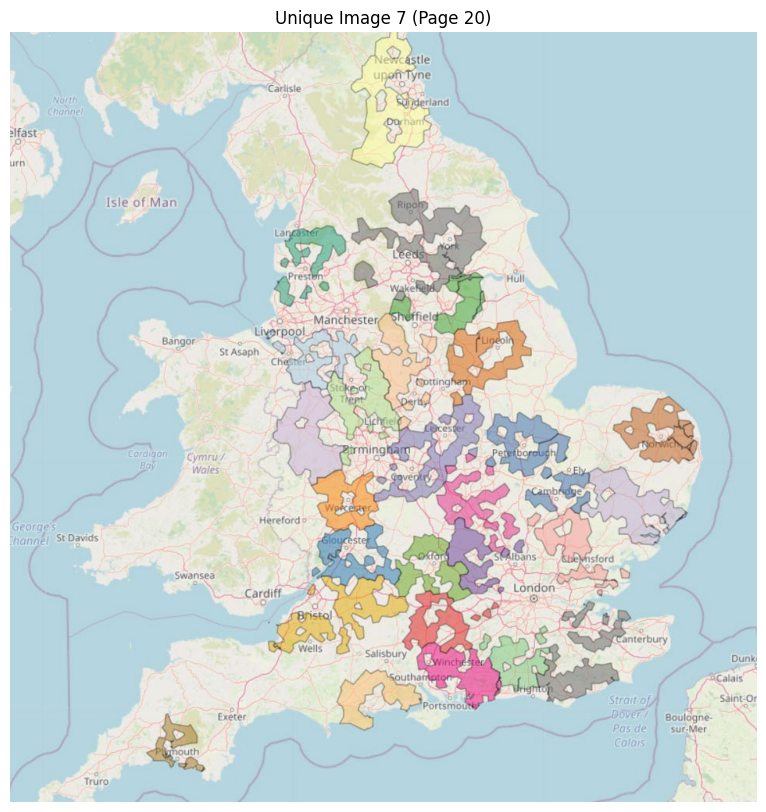


Text from Page 21:
  



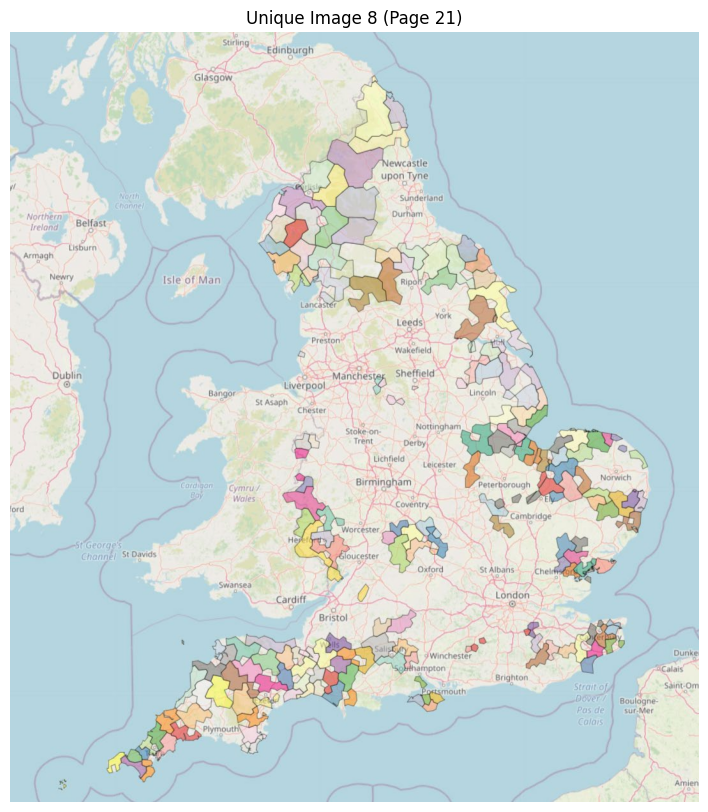


Text from Page 22:
 



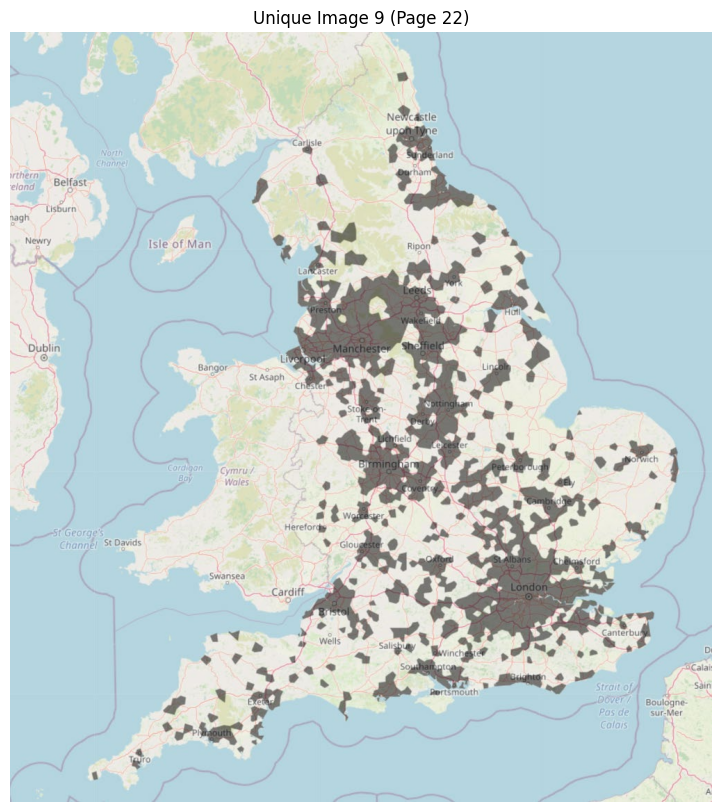


Text from Page 23:
 



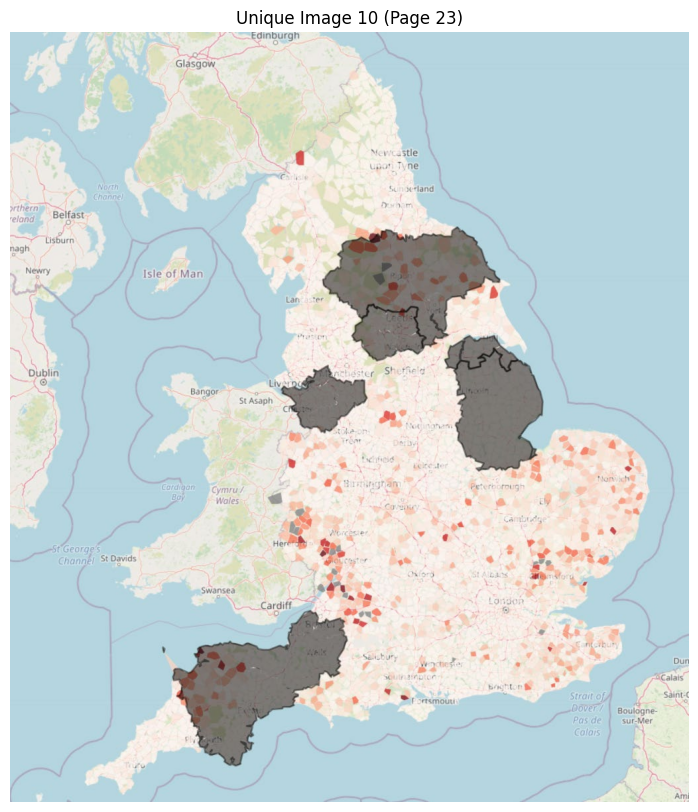


Text from Page 25:
Planning for Gigabit Delivery in 2021  



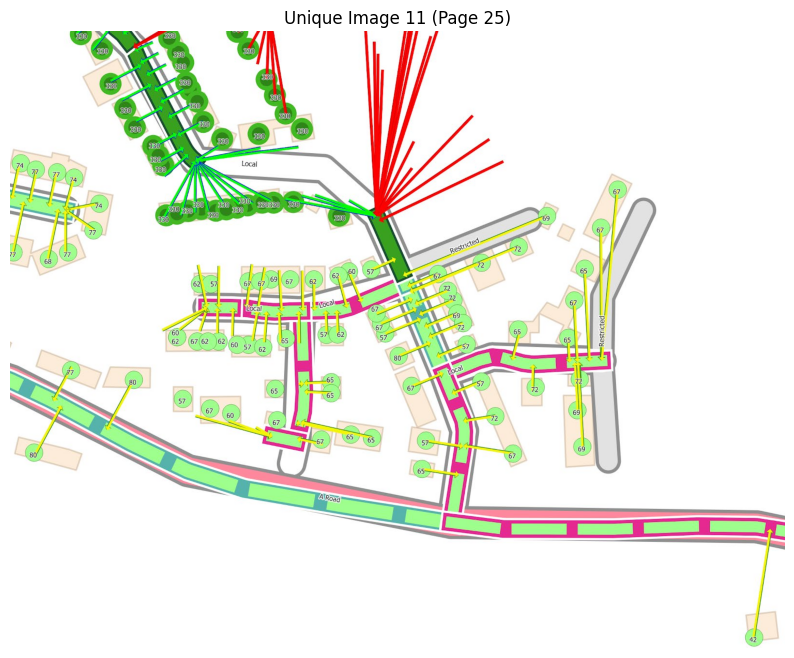


Text from Page 26:
2 



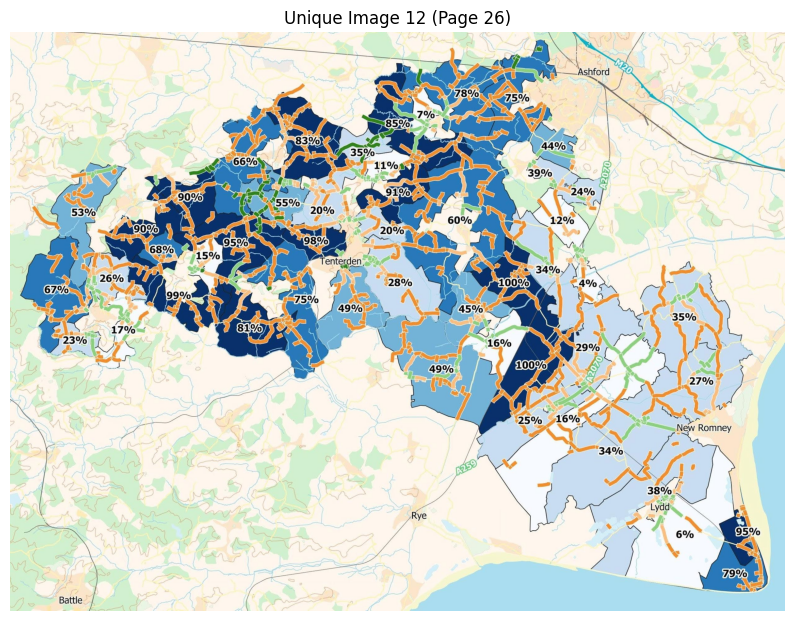


Text from Page 27:
Foreword by Matt Warman MP, Minister for Digital Infrastructure 



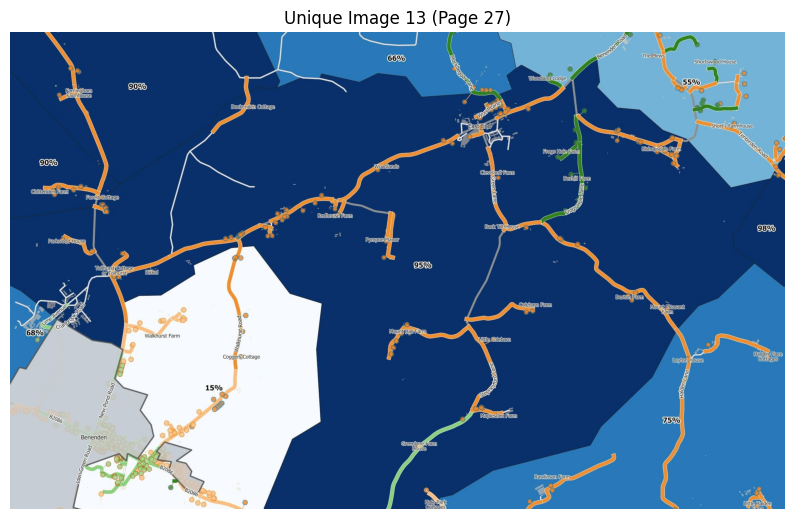


Text from Page 28:
 



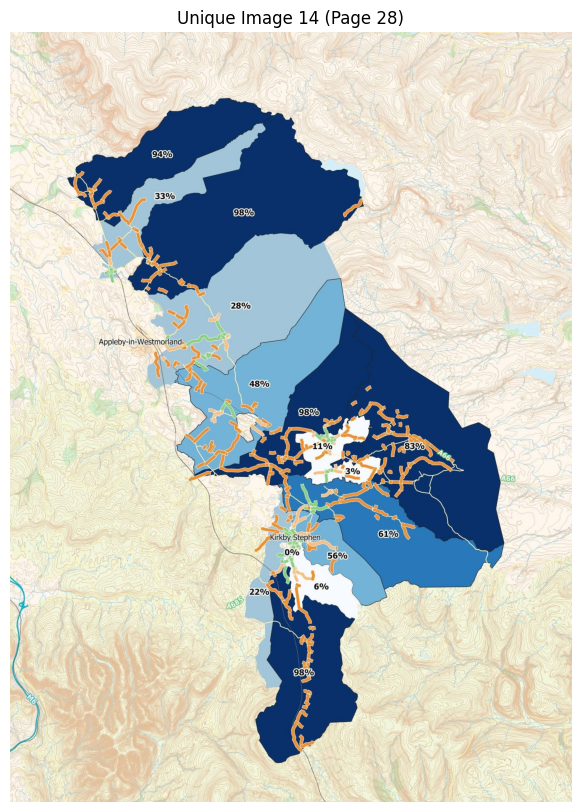


Cleaning up temporary files...


In [9]:
def display_image(img_data, title=None):
    """Helper function to display an image"""
    img = Image.open(BytesIO(img_data))
    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

print("## Test with S3 PDF")

# Create an S3 attachment for a PDF
pdf_key = "BDUK_Annual_Reports-Accounts_2024_-_Certified_copy.pdf"
bucket_name = "psycore-documents-445644858344"

print(f"Creating S3 attachment for {pdf_key}")
pdf_attachment = S3Attachment(s3_key=pdf_key, bucket_name=bucket_name, needsExtraction=True, attachment_data=pdf_key)

try:
    # Process the PDF
    print("Processing PDF...")
    pdf_attachment.extract()
    
    # Get the extracted text
    print("\nExtracted Text (first 500 chars):")
    print(pdf_attachment.attachment_data[:500] + "...")
    
    # Test Image Deduplication
    print("\n## Test Image Deduplication")
    extractor = PDFExtractor(pdf_attachment)
    results = extractor.process_pages()
    
    print(f"Total unique images found: {results['image_count']}")
    print(f"Total text length: {len(results['text'])} characters")
    
    # Display all unique images with their page text
    print("\nDisplaying all unique images with their page text:")
    for i, (img_hash, img_data) in enumerate(extractor.image_hashes.items()):
        page_num = img_data["page_num"]
        # Split text into pages and get text for this page
        page_text = results["text"].split("\n")[page_num]
        
        # Print the page text first
        print(f"\n{'='*80}")
        print(f"Text from Page {page_num + 1}:")
        print(f"{'='*80}")
        print(page_text)
        print(f"{'='*80}\n")
        
        # Then display the image
        display_image(
            img_data["bytes"],
            title=f"Unique Image {i+1} (Page {page_num + 1})"
        )
        
finally:
    # Clean up temporary files
    print("\nCleaning up temporary files...")
    pdf_attachment.cleanup()